<a href="https://colab.research.google.com/github/PurpleDin0/QDA_NLG_Detection/blob/master/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Perform Quantatative Discursive Analysis on Machine and Human Generated Text##

## Load all the relevant libraries & clone relevant repo's
---
- [Quantitative-Discursive-Analysis](https://github.com/metalcorebear/Quantitative-Discursive-Analysis) (v0.0.1): This is a library by [@metalcorebear](https://github.com/metalcorebear) that simplifies the creation of discursive objects and performing resonance analysis of those objects to each other.  I am importing a forked version of the QDA code, as this notebook is dependent upon the v0.0.1 code.  Additionally, the QDA code also requires several other packages in order to run succesfully.
  -  [numpy](https://numpy.org/) (v1.18.0):
  -  [networkx](https://networkx.github.io/) (v2.3): Version 2.4 of numpy is incomptable with this notebook.k
  -  [textblob](https://textblob.readthedocs.io/en/dev/) (v0.16.0):
- [pandas](https://pandas.pydata.org/) (v1.0.4): used to read in CSV data, do basic data cleaning, and store all our data.  This is a heavy hitter of Python for Data Science.
- [plot.ly](https://plot.ly/python/getting-started/) (v4.8.1.): Express is used for simple graphs and graph_objects is used for more complicated graphs.
 - NOTE: prior to [version 4.0](https://medium.com/plotly/plotly-py-4-0-is-here-offline-only-express-first-displayable-anywhere-fc444e5659ee) of plot.ly it defaulted to an online mode that was widely despised, but v4.0 fixes this issue.

  The below code also returns the versions of some of the modules, to help with documentation/academic paper writing.

- Clone the [QDA_NLG_Detection](https://github.com/PurpleDin0/QDA_NLG_Detection) repo:  This repo contains all the jupyter notebooks and source data that enables the workbooks.  With the exception of any dependant libraries (and python/iPythoin interpreter) it contains everything needed to replicate this analysis.

TODO LIST:
* [ ] Change any references to personal google drive `/content/drive/'My Drive'/'Colab Notebooks'` to `/content/Quantitative-Discursive-Analysis/`.  This is to make the code more useful in future research without modifications.
* [x] Analyze the original Sputnik training data against the generated content.
  * [ ] Perform the analysis by droping any values very close to 0 in the resonance matrix. 
* [ ] Remove all cells with `## DEBUG CELL ##`.  These are used to identify issues with the data or validate code executed succesfully.  They and this TODO item will be removed prior to the final commit.
* [ ] Delete and incorporate TODO list items into embbeded comments as they are complete to simplify third party review and code maintainability.  

In [ ]:
import os
# 0. Clone the repos and then change the working directory to the cloned folder
git_repo1 =  'QDA_NLG_Detection'  # 1st repo we want to clone
git_repo2 =  'Quantitative-Discursive-Analysis' # 2nd repo we want to clone
git_user = 'PurpleDin0' # User/org we want to clone the repo from

repo1_dir = os.path.join(os.getcwd(), git_repo1)
repo2_dir = os.path.join(os.getcwd(), git_repo2)

# Clone the QDA_NLG_Detection repository 
!git clone https://github.com/{git_user}/{git_repo1}.git
# Clone the fork of @metalcorebear's Quantitative-Discursive-Analysis repository 
!git clone https://github.com/{git_user}/{git_repo2}.git

# navigate to the QDA_NLG_Detection folder
os.chdir(repo1_dir)

# install required modules
# WARNING: Code is not compatible with networkx v2.4, this installs the compatable version 2.3
!pip install -r requirements.txt   

# navigate to the Quantitative-Discursive-Analysis folder and import the modules
# Note: instead of cloning the repo we could "!pip install QDA"
os.chdir(repo2_dir)
import QDA as QDA         
 
import pandas as pd  #import pandas
print("Pandas imported as Version: ",pd.__version__)

import plotly #import plotly
print("Plotly imported as Version: ",plotly.__version__)
import plotly.express as px

import pickle                     #So we can save any of our output variables for later use
import json                       #So we can import our saved JSON data
#from sys import getsizeof        # allows us to check the size of variables, good way to check that you don't blowup your VM by using to much memory.
#import string                ## Commented out as no longer needed
#import nltk

!python -m textblob.download_corpora #Downloads the required corpora for TextBlob to work 
#from nltk.corpus import stopwords
#import networkx as nx
import numpy as np

fatal: destination path 'QDA_NLG_Detection' already exists and is not an empty directory.
fatal: destination path 'Quantitative-Discursive-Analysis' already exists and is not an empty directory.
Pandas imported as Version:  1.0.5
Plotly imported as Version:  4.8.1
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package m

#Read in the data & create a dataframe from each source text 
Next we will read in the data to begin our analysis
* [x] **GPT-2 data:** This data was created by fine-tuning a 124M-parameter GPT-2 model with the Sputnik News data.  [Link to workbook here](https://github.com/PurpleDin0/QDA_NLG_Detection/blob/master/Train%20a%20GPT-2%20Text-Generating%20Model%20w_%20GPU.ipynb)
* [x] **Markovify data:** This data was created by training the markovify model with the Sputnik News data.  [Link to workbook here](https://github.com/PurpleDin0/QDA_NLG_Detection/blob/master/Data_Cleaining.ipynb)
* [x] **Sputnik News training data:** This is full text date we exported and trained the above two models on.







## Create GPT Text dataframe

In [ ]:
#navigate to where the data is stored
%cd /content/QDA_NLG_Detection/Data

#Open the data we generated with our fine tuned GPT-2 Model 
#Note: Due to GPU/RAM usage I had to make my file in 6 seperate runs this code recombines those files 
gpt_text_data = []
for n in range(1, 5):
    file_name = "gpt_sputnik_text_data_" + str(n) + ".json"
    
    with open(file_name, "r") as gpt_read_file:
        gpt_text_data += json.load(gpt_read_file)

# Build the DataFrame with GPT-2 generated text
gpt_df = pd.DataFrame(gpt_text_data, columns=['text']) #Store the GPT data in a DataFrame
gpt_df['length'] = gpt_df['text'].apply(lambda x : len(x)) #find the character length of each article
gpt_df['Sentance_count'] = gpt_df['text'].apply(lambda x : x.count('.')) #approximate sentance count of each article
gpt_df['Text_clean'] = gpt_df['text'].apply(lambda x : x.lower()) #make the text of each article lowercase
gpt_df['Text_clean'] = gpt_df['Text_clean'].str.replace('\n',' ') #remove new lines "\n" from the dataset
gpt_df['Text_clean'] = gpt_df['Text_clean'].str.replace('[^\w\s]','') #clean the data to remove all special characters and punctuation
gpt_df['word_count'] = gpt_df['Text_clean'].apply(lambda x : len(x.split())) #more accurate word count after all special chars have been removed

/content/QDA_NLG_Detection/Data


In [ ]:
## DEBUG CELL ##

print(gpt_df['Text_clean'][0])
print(gpt_df['text'][0])

##Create the Markovify dataframe
1. Import the Markovify data trained on the human text
2. Merge the individual Markovify sentences into article length content.  This is done to provide similar length text corpora.  However, as the Markovify text generator is limited to sentence length content generation, this will create a seemingly random string of sentences.  This will cause the discursive graphs of the Markovify content to be less <font color=red>?focused? (not the right word to describe this)</font>.  This will likely result in the markovify content being deemed more discursively disimilar to coherent article length content.  As Markovify is a content generator that lacks the ["Attention Mechansism"](http://jalammar.github.io/illustrated-gpt2/) of GPT-2 or many of the other advanced natural language generation models.  Since this is a fundemental weakness of text-generation using Markovify, and as the focus is to identify machine-generated versus human-generated text in long-form articles, this is an acceptable issue with the dataset.   

In [ ]:
#navigate to where the data is stored
%cd /content/QDA_NLG_Detection/Data

# 
with open("markovify_text_stored.json", "r") as markovify_read_file: 
    markovify_text_data = json.load(markovify_read_file)
markovify_sentences = ['']
i = 0
for sentence in markovify_text_data:
    markovify_sentences[i] += sentence + ' '
    if len(markovify_sentences[i]) > gpt_df['length'].mean():
        markovify_sentences.append('')
        i += 1
 
# Build the DataFrame with markovify generated text
markovify_df = pd.DataFrame(markovify_sentences, columns=['text'])
markovify_df['length'] = markovify_df['text'].apply(lambda x : len(x)) #find the character length of each "article"
markovify_df['Sentance_count'] = markovify_df['text'].apply(lambda x : x.count('.')) #approximate sentance count of each "article"
markovify_df['Text_clean'] = markovify_df['text'].apply(lambda x : x.lower()) #make the text of each article lowercase
markovify_df['Text_clean'] = markovify_df['Text_clean'].str.replace('\n',' ') #remove new lines "\n" from the dataset
markovify_df['Text_clean'] = markovify_df['Text_clean'].str.replace('[^\w\s]','') #clean the data to remove all special characters and punctuation
markovify_df['word_count'] = markovify_df['Text_clean'].apply(lambda x : len(x.split())) #more accurate word count after all special chars have been removed

/content/QDA_NLG_Detection/Data


## Create the human text dataframe
1. [x] Input the human text that was used to train the markovify and fine-tune the GPT-2 model.  
  ***NOTE: This data was used to train the model, and we are using it to compare against the trained model to increase the potential that we will find resonance between the trained models and the source text.  If there is little resonance found we can assume that using a different set of human text will further decrease resonance.***  
2. [ ] Input a second selection of human text in the same style of the training text (e.g. Sputnik data from a different time period).  This dataset should have a lower resonance then the training/fine-tuning dataset as topics in discourse tend to drift over time.  We will load sputnik data from the ~2 weeks before and after the training data.

In [ ]:
#navigate to where the data is stored
%cd /content/QDA_NLG_Detection/Data

# Load the file that contains the data used to train the model
# This Dataframe will consist of English_Language-State_Media from 15 Oct 2019 to 15 Nov 2019
training_data = pd.read_csv('English_Language-State_Media-10_15_to_11_15-2019.csv') #imports the file

#cleans up the columns by replacing spaces with "_"
training_data.columns = training_data.columns.str.replace(' ', '_')  

training_data = training_data.drop(columns=['Unnamed:_0']) #drop the old index from the csv file

#Replace NA content in the Body column with blank (i.e. "") values
values = {'Body': ""} #create a dictionary with the columns that you want to search and the value you want to replace.
training_data = training_data.fillna(value=values) #Replaces all NA values based on the values dictionary

/content/QDA_NLG_Detection/Data


In [ ]:
#navigate to where the data is stored
%cd /content/QDA_NLG_Detection/Data

# Load the file that contains data that wasn't used to train the model
# This Dataframe will consist of English_Language-State_Media from ~2 weeks before and after the data used to train the model

#Load the two files and create one DataFrame using the data not used to train the model
other_data = pd.concat([pd.read_csv('English_Language-State_Media-10_01_to_10_14-2019.csv') ,
                        pd.read_csv('English_Language-State_Media-11_16_to_11_30-2019.csv')
                       ])
# Reset the index after joining the dataframes
other_data = other_data.reset_index(drop=True) 

#cleans up the columns by replacing spaces with "_"
other_data.columns = other_data.columns.str.replace(' ', '_') 

other_data = other_data.drop(columns=['Unnamed:_0']) #drop the old index from the csv file

#Replace NA content in the Body column with blank (i.e. "") values
values = {'Body': ""} #create a dictionary with the columns that you want to search and the value you want to replace.
other_data = other_data.fillna(value=values) #Replaces all NA values based on the values dictionary

/content/QDA_NLG_Detection/Data


In [ ]:
## DEBUG CELL ##
other_data


### Select the human generated content
1. [X] Get the Sputnik data that was used to train the model.  We will further reduce our selected data by selecting the data with min/max length similar to that of both the GPT and Markovify machine generated text data.
2. [X] Get the Sputnik data that was not used to train the model.  We will further reduce our selected data by selecting the data with min/max length similar to that of both the GPT and Markovify machine generated text data.

In [ ]:
###############################################################################
# Build the Dataframe with the sputnik training data
sputnik_training_df = training_data.loc[training_data['Source_Name'] == 'Sputnik', :]

sputnik_training_df['length'] = sputnik_training_df['Body'].apply(lambda x : len(x))

# Drop the long (over 4000 characters) and short (under 3000 characters) articles from the dataframe
# This is done to ensure the content length of each article is approxamitley the same at 3500 characters, which is about 575 words or 1 page. 
sputnik_training_df = sputnik_training_df[sputnik_training_df.length.between(3000, 4000)]

# Add additional information to the dataframe
sputnik_training_df['length'] = sputnik_training_df['Body'].apply(lambda x : len(x)) #find the character length of each "article"
sputnik_training_df['Sentance_count'] = sputnik_training_df['Body'].apply(lambda x : x.count('.')) #approximate sentance count of each "article"
sputnik_training_df['Text_clean'] = sputnik_training_df['Body'].apply(lambda x : x.lower()) #make the text of each article lowercase
sputnik_training_df['Text_clean'] = sputnik_training_df['Text_clean'].str.replace('\n',' ') #remove new lines "\n" from the dataset
sputnik_training_df['Text_clean'] = sputnik_training_df['Text_clean'].str.replace('[^\w\s]','') #clean the data to remove all special characters and punctuation
sputnik_training_df['word_count'] = sputnik_training_df['Text_clean'].apply(lambda x : len(x.split())) #more accurate word count after all special chars have been removed

###############################################################################
# Build the Dataframe with the sputnik data that was not used for training
sputnik_other_df = other_data.loc[other_data['Source_Name'] == 'Sputnik', :]

sputnik_other_df['length'] = sputnik_other_df['Body'].apply(lambda x : len(x))

# Drop the long (over 4000 characters) and short (under 3000 characters) articles from the dataframe
# This is done to ensure the content length of each article is approxamitley the same at 3500 characters, which is about 575 words or 1 page. 
sputnik_other_df = sputnik_other_df[sputnik_other_df.length.between(3000, 4000)]

# Add additional information to the dataframe
sputnik_other_df['length'] = sputnik_other_df['Body'].apply(lambda x : len(x)) #find the character length of each "article"
sputnik_other_df['Sentance_count'] = sputnik_other_df['Body'].apply(lambda x : x.count('.')) #approximate sentance count of each "article"
sputnik_other_df['Text_clean'] = sputnik_other_df['Body'].apply(lambda x : x.lower()) #make the text of each article lowercase
sputnik_other_df['Text_clean'] = sputnik_other_df['Text_clean'].str.replace('\n',' ') #remove new lines "\n" from the dataset
sputnik_other_df['Text_clean'] = sputnik_other_df['Text_clean'].str.replace('[^\w\s]','') #clean the data to remove all special characters and punctuation
sputnik_other_df['word_count'] = sputnik_other_df['Text_clean'].apply(lambda x : len(x.split())) #more accurate word count after all special chars have been removed


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Analyze the three dataframes
Check the length of the four dataframes to ensure the text content is of similar size

In [ ]:
#Print the basics statistics for the four dataframes
print('****************** GPT Data ******************')
print(gpt_df.describe(), '\n')

print('*************** Markovify Data ***************')
print(markovify_df.describe(), '\n')

print('************ Sputnik training Data ***********')
print(sputnik_training_df.describe(), '\n') 

print('************* Other Sputnik Data *************')
print(sputnik_other_df.describe(), '\n')

****************** GPT Data ******************
            length  Sentance_count  word_count
count   500.000000      500.000000  500.000000
mean   3548.610000       27.096000  599.680000
std     377.406392        8.805786   73.528951
min     855.000000        1.000000   12.000000
25%    3395.000000       23.000000  586.000000
50%    3602.500000       27.000000  613.500000
75%    3785.250000       30.000000  636.000000
max    4345.000000      156.000000  699.000000 

*************** Markovify Data ***************
            length  Sentance_count  word_count
count   544.000000      544.000000  544.000000
mean   3680.511029       25.011029  599.768382
std     130.969061        4.018817   23.790399
min    2659.000000       11.000000  428.000000
25%    3587.000000       22.000000  584.000000
50%    3644.500000       25.000000  596.000000
75%    3741.000000       28.000000  612.000000
max    4331.000000       37.000000  702.000000 

************ Sputnik training Data ***********
         

# Instantiate discursive objects for each text corpora
* [x] Create a QDA discursive object for each article in the markovify, GPT-2, and human text data.  
  Compute Time Note: on Google Colab QDA objects can be created for each ~1500 articles in under 1 minute.
* [x] Add these QDA objects to the dataframe

In [ ]:
## Compute the QDA object for each "article" in the four Dataframes

markovify_df['QDA_object'] = markovify_df['text'].apply(lambda x :  QDA.discursive_object(x))

gpt_df['QDA_object'] = gpt_df['text'].apply(lambda x :  QDA.discursive_object(x))

sputnik_training_df['QDA_object'] = sputnik_training_df['Body'].apply(lambda x :  QDA.discursive_object(x))

sputnik_other_df['QDA_object'] = sputnik_other_df['Body'].apply(lambda x :  QDA.discursive_object(x))

In [ ]:
pwd

'/content/QDA_NLG_Detection/Data'

In [ ]:
## DEBUG ##
# Save the data locally for future use

pickle.dump(markovify_df, open( "markovify_df.p", "wb" ) )
pickle.dump(gpt_df, open( "gpt_df.p", "wb" ) )
pickle.dump(sputnik_training_df, open( "sputnik_training_df.p", "wb" ) )
pickle.dump(sputnik_other_df, open( "sputnik_other_df.p", "wb" ) )

# Create the Discursive simularity matrixs

1. [x] Create a discursive community matrix for the GPT, Markovify, training, and human created text data
2. [ ] Create a discursive community matrix for a sample of the GPT, Markovify, training human text, and non-training human text data.  This was done as it was not possible to create a matrix for all of the generated text and human text training data.

In [ ]:
# Create the discursive community matrix for the GPT data 
gpt_discursive_community = QDA.discursive_community(gpt_df['QDA_object'].to_list())

# Save the discursive community matrix to Google Drive for later input
%cd '/content/drive/My Drive/Colab Notebooks/Thesis'
pickle.dump(gpt_discursive_community, open( "gpt_discursive_community.p", "wb" ) )

# Create the discursive community matrix for the markovify data 
markovify_discursive_community = QDA.discursive_community(markovify_df['QDA_object'].to_list())
 
# Save the discursive community matrix to Google Drive for later input
%cd '/content/drive/My Drive/Colab Notebooks/Thesis'
pickle.dump(markovify_discursive_community, open( "markovify_discursive_community.p", "wb" ) )
 
# Create the discursive community matrix for the Sputnik data 
sputnik_discursive_community = QDA.discursive_community(sputnik_df['QDA_object'].to_list())
 
# Save the discursive community matrix to Google Drive for later input
%cd '/content/drive/My Drive/Colab Notebooks/Thesis'
pickle.dump(sputnik_discursive_community, open( "sputnik_discursive_community.p", "wb" ) )

/content/drive/My Drive/Colab Notebooks/Thesis


In [ ]:
## WARNING: Quantity of objects in the three dataframes is ~1500 and to great to analyze with Google Colab
## Create the discursive community matrix for the entire dataset
#merged_QDA_objects = gpt_df['QDA_object'].to_list() + markovify_df['QDA_object'].to_list() + sputnik_df['QDA_object'].to_list()
#merged_discursive_community = QDA.discursive_community(merged_QDA_objects)

## Save the discursive community matrix to Google Drive for later input
#%cd '/content/drive/My Drive/Colab Notebooks/Thesis'
#pickle.dump(markovify_discursive_community, open( "merged_data_discursive_community.p", "wb" ) )

In [ ]:
# Create a discursive community matrix for a subset of the entire dataset
# select a random 100 entries from each text set (GPT, Markovify, and Human_text)
# to enable result reproducibilty random_sate is set to the integer "1984" 

gpt_sample_df = gpt_df.sample(n=100, random_state=1984)
markovify_sample_df = markovify_df.sample(n=100, random_state=1984)
sputnik_training_sample_df = sputnik_training_df.sample(n=100, random_state=1984)
sputnik_other_sample_df = sputnik_other_df.sample(n=100, random_state=1984)

sample_discursive_objects = ( gpt_sample_df['QDA_object'].to_list()       + 
                              markovify_sample_df['QDA_object'].to_list() +
                              sputnik_training_sample_df['QDA_object'].to_list()   +
                              sputnik_other_sample_df['QDA_object'].to_list() )

sample_discursive_community = QDA.discursive_community(sample_discursive_objects)

## DEBUG ##
# Save the discursive community matrix to Google Drive for later input
%cd '/content/drive/My Drive/Colab Notebooks/Thesis'
pickle.dump(sample_discursive_community, open( "sample_discursive_community.p", "wb" ) )


/content/drive/My Drive/Colab Notebooks/Thesis


# Analyze Discursive simularity matrixs

1. [ ] Load the saved discursive community matrices for the GPT, Markovify, Human text, and merged_sample data
2. [ ] Anlayze that data to see if anything can be learned from looking at the data when compared to itself



## Load the discursive community matrix

In [ ]:
#Load the discursive community matrix into a dataframe
%cd '/content/QDA_NLG_Detection/Data'
sample_discursive_community = pd.read_pickle("sample_discursive_community.p")
sample_discursive_community_df = pd.DataFrame(sample_discursive_community.A)
sample_discursive_community_df

/content/QDA_NLG_Detection/Data


0         1         2    3    ...       396       397       398       399
0    0.000000  0.044496  0.004472  0.0  ...  0.000000  0.000000  0.000000  0.000000
1    0.044496  0.000000  0.705371  0.0  ...  0.424850  0.004024  0.033941  0.305055
2    0.004472  0.705371  0.000000  0.0  ...  0.567124  0.000000  0.077723  0.400802
3    0.000000  0.000000  0.000000  0.0  ...  0.000000  0.000000  0.000000  0.000000
4    0.000000  0.000000  0.000000  0.0  ...  0.000000  0.000000  0.000000  0.000000
..        ...       ...       ...  ...  ...       ...       ...       ...       ...
395  0.000000  0.000000  0.000000  0.0  ...  0.000000  0.556666  0.000000  0.245167
396  0.000000  0.424850  0.567124  0.0  ...  0.000000  0.000000  0.036276  0.439961
397  0.000000  0.004024  0.000000  0.0  ...  0.000000  0.000000  0.000000  0.138894
398  0.000000  0.033941  0.077723  0.0  ...  0.036276  0.000000  0.000000  0.464626
399  0.000000  0.305055  0.400802  0.0  ...  0.439961  0.138894  0.464626  0.000000

[400 rows x 400 columns]

0         1    2         3    4    ...  395  396       397  398      399
3    0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.000000  0.0  0.00000
4    0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.000000  0.0  0.00000
19   0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.000000  0.0  0.00148
29   0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.000000  0.0  0.00000
30   0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.000000  0.0  0.00000
44   0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.000000  0.0  0.00000
61   0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.000000  0.0  0.00000
65   0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.000000  0.0  0.00000
79   0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.000000  0.0  0.00000
81   0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.000000  0.0  0.00000
95   0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.000000  0.0  0.00000
215  0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.000000  0.0  0.00000
216  0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.000000  0.0  0.00000
218  0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.000000  0.0  0.00000
223  0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.000000  0.0  0.00000
230  0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.000000  0.0  0.00000
231  0.0  0.000000  0.0  0.017891  0.0  ...  0.0  0.0  0.000000  0.0  0.00000
283  0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.000000  0.0  0.00000
315  0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.000000  0.0  0.00000
343  0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.000000  0.0  0.00000
363  0.0  0.000839  0.0  0.000000  0.0  ...  0.0  0.0  0.000335  0.0  0.00000
369  0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.010558  0.0  0.00000

[22 rows x 400 columns]

## Display a heatmap of the resonance matrix

In [ ]:
#Display a heatmap of the resonance matrix
fig = px.imshow(sample_discursive_community_df.values,
                labels=dict(x="", y=" ", color="Resonance")
                )

# Update the layout to add information on sourcedata
# that is add a label for the data that came from GPT, Markovify, training, or control

fig.update_layout(
    annotations=[
        dict(
            x=0.32,
            y=1.1,
            showarrow=False,
            text="GPT",
            xref="paper",
            yref="paper"
            ),
        dict(
            x=0.45,
            y=1.1,
            showarrow=False,
            text="Markovify",
            xref="paper",
            yref="paper"
            ),
        dict(
            x=0.55,
            y=1.1,
            showarrow=False,
            text="Training",
            xref="paper",
            yref="paper"
            ),
        dict(
            x=.7,
            y=1.1,
            showarrow=False,
            text="Control",
            xref="paper",
            yref="paper"
            ),
         dict(
            x=0.235,
            y=0.9,
            showarrow=False,
            text="GPT",
            xref="paper",
            yref="paper",
            ),
        dict(
            x=0.2,
            y=0.65,
            showarrow=False,
            text="Markovify",
            xref="paper",
            yref="paper"
            ),
        dict(
            x=0.215,
            y=0.4,
            showarrow=False,
            text="Training",
            xref="paper",
            yref="paper"
            ),
        dict(
            x=0.22,
            y=0.12,
            showarrow=False,
            text="Control",
            xref="paper",
            yref="paper"
            ),           
                ]
                  )

# Update the axes and display the chart            
fig.update_xaxes(side="top", fixedrange=True)
fig.update_yaxes(tick0=0, dtick=100, fixedrange=True)
fig.show()

### Try a different type of heatmap

In [ ]:
#Create a list that cooresponds to the type of text source used to create the resonance matrix
legend = []
for i in range(0,400):
    if i < 100:
        legend.append('gpt')
    elif i < 200:
        legend.append('markovify')
    elif i < 300:
        legend.append('training')    
    elif i < 400:
        legend.append('control')

#Display a heatmap using this legend
fig = px.imshow(sample_discursive_community_df.values,
                labels=dict(x="", y=" ", color="Resonance"),
                x=legend,
                y=legend
                )

fig.update_xaxes(side="top")
fig.show()

## Update the dataframe with a multi-index

In [ ]:
# Build the Multiindex
# Multiindex will the source of the content to the DF on both axis
level_1 = ['gpt'] * 100 + ['markovify'] * 100 + ['training'] * 100 + ['control'] * 100
level_2 = list(range(0, 400))
arrays = [level_1, level_2]
multi_index = pd.MultiIndex.from_arrays(arrays, names=('type', 'sample'))

# Build a new dataframe with the multiinddex 
sample_dc_mi_df = pd.DataFrame(data=sample_discursive_community_df.values, index=multi_index, columns=multi_index)

# Build another dataframe that replaces the 0 values with NaN
sample_dc_mi_NaN_df = sample_dc_mi_df.replace(0, np.nan)

In [ ]:
## Construct a dataframe of the average resonance for each data source (e.g. 'gpt', 'markovofy')
data_source = ['gpt', 'markovify', 'training', 'control']
results_df = pd.DataFrame(index=data_source, columns=data_source)
results_NaN_df = pd.DataFrame(index=data_source, columns=data_source)
for col in data_source:
  for row in data_source:
    results_df[row][col] = sample_dc_mi_df.loc[row, col].mean().mean()
    results_NaN_df[row][col] = sample_dc_mi_NaN_df.loc[row, col].mean().mean()
results_df

#sample_dc_mi_df.loc['gpt', 'gpt'].sum().sum()

gpt  markovify   training    control
gpt        0.0831213    0.12921   0.074649  0.0670044
markovify    0.12921   0.210469   0.113165  0.0986177
training    0.074649   0.113165  0.0705105  0.0660216
control    0.0670044  0.0986177  0.0660216  0.0589523

In [ ]:
results_NaN_df

gpt markovify  training   control
gpt        0.152735  0.208691  0.142138  0.133588
markovify  0.233391  0.323151  0.220206  0.187828
training   0.135471  0.178518  0.125735  0.122859
control     0.13608  0.163664   0.12607   0.11929

In [ ]:
# Plot the results
fig = px.imshow(results_df.values,
                labels=dict(x="", y=" ", color="Resonance"),
                x = data_source,
                y = data_source)

fig.update_xaxes(side="top")
fig.show()

In [ ]:
# Plot the results
fig = px.imshow(results_NaN_df.values,
                labels=dict(x="", y=" ", color="Resonance"),
                x = data_source,
                y = data_source)

fig.update_xaxes(side="top")
fig.show()

In [ ]:
results_NaN_df - results_df

gpt  markovify   training    control
gpt        0.0696141  0.0794807  0.0674888   0.066584
markovify   0.104181   0.112683   0.107041  0.0892101
training   0.0608224   0.065353   0.055224  0.0568375
control    0.0690754   0.065046  0.0600486  0.0603374

In [ ]:
## DEBUG ##
# Not sure what the previous graph is telling us.  
# The resonance is so low with each of these blocks it may be good to see what happens if we drop the small values from the DF.
items_to_drop

Int64Index([  3,   4,  19,  29,  30,  44,  61,  65,  79,  81,  95, 215, 216,
            218, 223, 230, 231, 283, 315, 343, 363, 369],
           dtype='int64')

In [ ]:
items_to_drop = sample_discursive_community_df[sample_discursive_community_df.sum(axis = 0, skipna = True) < 5].index
sample_discursive_community_df.sum(axis = 0, skipna = True).describe()

count    400.000000
mean      38.009710
std       32.846875
min        0.000000
25%        8.216384
50%       29.646114
75%       64.799186
max      111.498057
dtype: float64

In [ ]:
# Drop the columns/rows that have a low average resonance
items_to_drop = sample_discursive_community_df[sample_discursive_community_df.sum(axis = 0, skipna = True) < 1].index
strong_res = sample_discursive_community_df.drop(index=items_to_drop, columns=items_to_drop)

In [ ]:
strong_res.columns

Int64Index([  1,   2,   5,   7,  12,  14,  15,  16,  17,  18,
            ...
            370, 373, 380, 381, 383, 385, 386, 390, 396, 399],
           dtype='int64', length=199)

In [ ]:
items_to_drop = sample_discursive_community_df[sample_discursive_community_df.sum(axis = 0, skipna = True) < 60].index
strong_res = sample_discursive_community_df.drop(index=items_to_drop, columns=items_to_drop)

fig = px.imshow(strong_res,
                labels=dict(x="", y="", color="Resonance"),
                color_continuous_scale=["white", "white", "green", "blue", "black"],
                x=strong_res.index,
                y=strong_res.columns)
# Update the axes and display the chart            
fig.update_xaxes(side="top", fixedrange=True)
fig.update_yaxes(tick0=0, dtick=100, fixedrange=True)
fig.show()

In [ ]:
fig = px.imshow(sample_dc_mi_df,
                labels=dict(x="", y=" ", color="Resonance"),
                color_continuous_scale=["white", "yellow", "green", "blue", "black"]
                )
# Update the axes and display the chart            
fig.update_xaxes(side="top", fixedrange=True)
fig.update_yaxes(tick0=0, dtick=100, fixedrange=True)
fig.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt 
from copy import deepcopy
G = markovify_df['QDA_object'][129].graph
#Calculate degree centralities
degree_centralities = nx.degree_centrality(G)
one_degree = min(degree_centralities.values())

#Get nodes of one degree:
one_degree_nodes = []
for node in degree_centralities.keys():
    if degree_centralities[node] == one_degree:
        one_degree_nodes.append(node)

#Create copy of the graph 
H = deepcopy(G)

#Remove nodes with only one connection
for node in one_degree_nodes:
    H.remove_node(node)

In [ ]:
#nx.draw(H)


nx.degree_centrality(G)
# networkx draw() plt.draw() # pyplot draw()

{'#': 0.015748031496062992,
 "'s": 0.14173228346456693,
 '<': 0.07874015748031496,
 '>': 0.06299212598425197,
 'accurate': 0.015748031496062992,
 'activities.': 0.047244094488188976,
 'actor': 0.031496062992125984,
 'adler': 0.015748031496062992,
 'air': 0.015748031496062992,
 'airborne': 0.047244094488188976,
 'annegret': 0.047244094488188976,
 'arnold': 0.031496062992125984,
 'assanges': 0.015748031496062992,
 'bays': 0.015748031496062992,
 'birthday': 0.015748031496062992,
 'bomb': 0.015748031496062992,
 'brew': 0.031496062992125984,
 'british': 0.031496062992125984,
 'cabinet': 0.015748031496062992,
 'car': 0.06299212598425197,
 'career': 0.015748031496062992,
 'chancellor': 0.015748031496062992,
 'christie': 0.031496062992125984,
 'conway': 0.047244094488188976,
 'correctional': 0.031496062992125984,
 'country': 0.015748031496062992,
 'coverage': 0.06299212598425197,
 'curious': 0.031496062992125984,
 'custom-built': 0.06299212598425197,
 'cybercrime': 0.015748031496062992,
 'deat

# DEBUG

In [ ]:
sample_discursive_community_df.to_csv('sample_discursive_community.csv')

# Determine any clustering

In [ ]:
#Code to check that the matrix was created succesfully
sample_discursive_community_df[0][110]
#QDA.resonate(sample_discursive_objects[0],sample_discursive_objects[100])

0.0

# DEBUG SECTION
This section is used to run test code, debug errors, and try ideas.  Delete before going final.

In [ ]:
# see if we have enough data in the keyword's column to do anything
other_data.iloc[other_data.Keywords.dropna().index]

Title  ... Source_Medium
2642   'Carter's Statement is Another Way of Finding ...  ...      Internet
2643   Veteran Bollywood Actor Outlines How Web Serie...  ...      Internet
2645   Russia Helps China Build Missile-Attack Warnin...  ...      Internet
2646   US: Chicago Teachers to Go on Strike Oct.17 If...  ...      Internet
2647   Iranian Women Achieve Major Victory With New C...  ...      Internet
...                                                  ...  ...           ...
23800  ‘Deathly Gravitational Embrace’: Researcher Pr...  ...      Internet
23801  Ancient Egyptian Bombshell: It’s Now Known Who...  ...      Internet
23802  Will You Marry Me? Italian MP Proposes to His ...  ...      Internet
23809  Time for Nap: Little Golden Retriever Pup Badl...  ...      Internet
23812  'Black Friday' Protests: Amazon Needs to Work ...  ...      INTERNET

[4270 rows x 7 columns]

In [ ]:
other_data

Title  ... Source_Medium
0      Black hole caught flickering violently WITHIN ...  ...      INTERNET
1      One out, another one in: Retreating US militar...  ...      INTERNET
2      Sounds grate! Saudi military orchestra welcome...  ...      INTERNET
3      Tehran to continue scaling back commitments to...  ...      INTERNET
4      'Our approach hasn't changed': Kremlin rules o...  ...      INTERNET
...                                                  ...  ...           ...
13220  Just think of the US’ Endless Wars as a consta...  ...      INTERNET
13221  This is the BIG reason why corporate America h...  ...      INTERNET
13222  Tory manifesto pledge to deploy BBC as state m...  ...      INTERNET
13223  Like or hate the turkey, but don’t spoil the f...  ...      INTERNET
13224  ‘Russia routs the Brits’ says defense contract...  ...      INTERNET

[23948 rows x 7 columns]

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



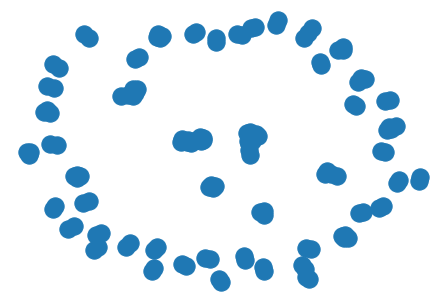

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
nx.draw(qda2.graph)

In [ ]:
# Read in the 
%cd '/content/drive/My Drive/Colab Notebooks/Thesis'

pd.read_pickle('merged_data_discursive_community.p')

df['num_legs'].sample(n=3, random_state=1)

/content/drive/My Drive/Colab Notebooks/Thesis


NameError: ignored

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



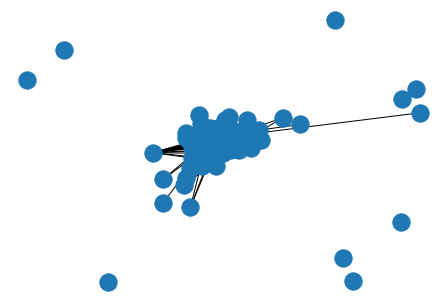

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
nx.draw(test1.G)


In [ ]:
sputnik_discursive_community.A

array([[0.        , 0.2526012 , 0.38270919, ..., 0.        , 0.44103134,
        0.        ],
       [0.2526012 , 0.        , 0.07984948, ..., 0.25331401, 0.15324322,
        0.        ],
       [0.38270919, 0.07984948, 0.        , ..., 0.04359263, 0.23433881,
        0.        ],
       ...,
       [0.        , 0.25331401, 0.04359263, ..., 0.        , 0.        ,
        0.        ],
       [0.44103134, 0.15324322, 0.23433881, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
gpt_df['QDA_object'].to_list()

In [ ]:
QDA.resonate(qda1, qda2)


0.12274007202687867

Check to see what version of python and such is running

In [ ]:
from platform import python_version

print(python_version())
#Note to self: Write a module that returns all sources 

3.6.9


# License Information
MIT License

Copyright (c) 2020 Barney Ales

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.